# Posterior entropy

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import darc
from darc.delayed import models
from darc.designs import DARCDesign
from darc.delayed.designs import Griskevicius2011, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [4]:
true_params = pd.DataFrame.from_dict({'logk': [-4], 'α': [2]})

## Run a simulated experiment

In [5]:
design_thing = DARCDesign(max_trials=40, 
                         RA=list(np.arange(5, 99+1, 1)), 
                         DB=list(np.arange(1, 365, 7)))

model = models.Hyperbolic(n_particles=5000)
model.θ_true = true_params

fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)

/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:153: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:226: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


In [6]:
summary_stats.head()

,logk_entropy,logk_median,logk_mean,logk_lower50,logk_upper50,logk_lower95,logk_upper95
0,1.427189,-4.498704,-4.506568,-5.183134,-3.839383,-6.457070,-2.545283
1,0.888900,-3.762025,-3.648264,-4.069676,-3.308012,-4.416840,-2.261968
2,0.291366,-4.114608,-4.110284,-4.260285,-3.936240,-4.661947,-3.565188
3,0.049980,-4.231824,-4.260729,-4.328233,-4.122082,-4.868376,-3.974210
4,-0.663072,-4.176318,-4.156710,-4.220795,-4.078068,-4.349398,-3.935037


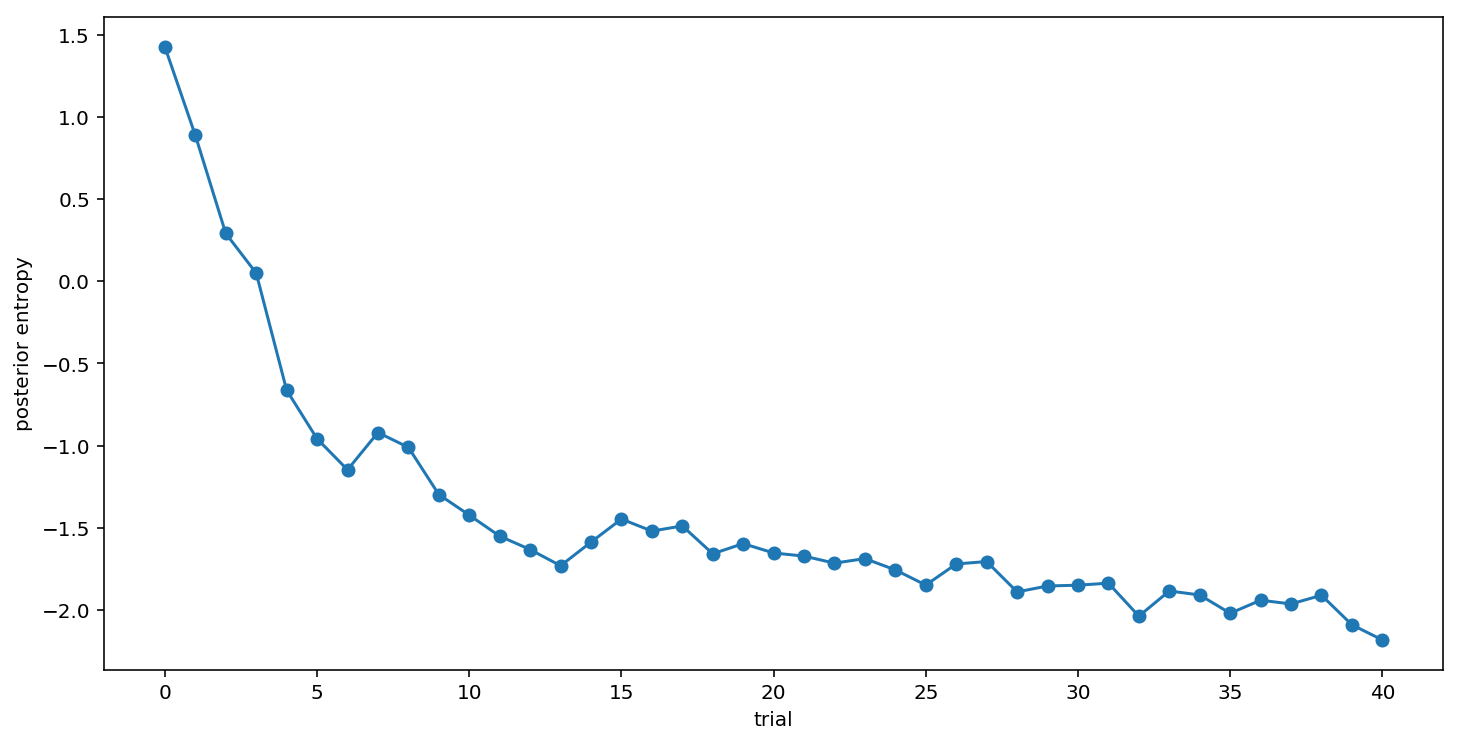

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_stats['logk_entropy'], '-o')

ax.set_xlabel('trial')
ax.set_ylabel('posterior entropy');

## How does posterior entropy decrease over trials?

In [8]:
N_SIMULATIONS = 10  # should be 500 for the final plot to go in the paper

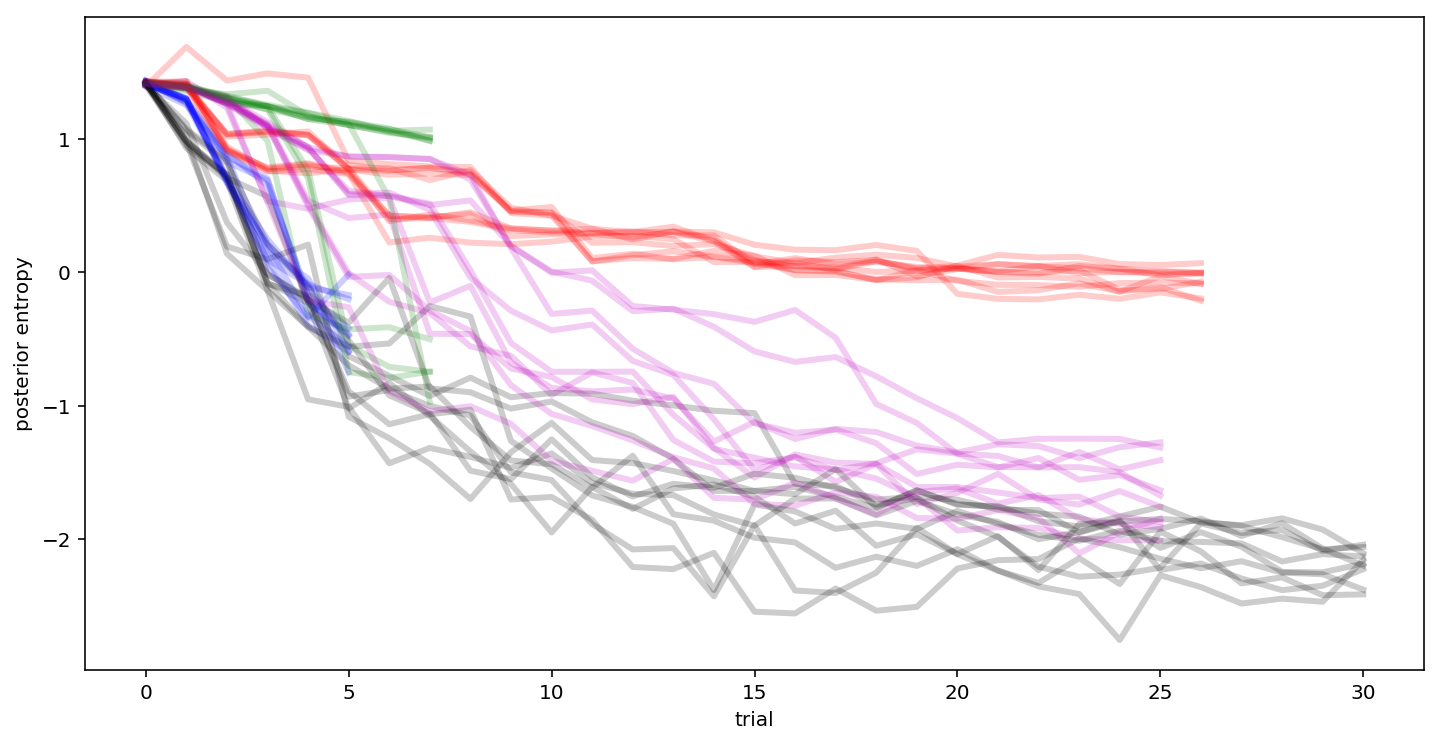

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in range(N_SIMULATIONS):
    
    # TODO: choose correct prior over logk
    true_params = pd.DataFrame.from_dict({'logk': [norm(-4.5, 1).rvs()],
                                          'α': [2]})
    
    # Kirby ----------------------------------------------------------------------
    design_thing = Kirby2009()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'r-', lw=3, alpha=0.2)
    
    # Griskevicius2011 ----------------------------------------------------------
    design_thing = Griskevicius2011()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'g-', lw=3, alpha=0.2)
    
    # Koffarnus_Bickel ----------------------------------------------------------
    design_thing = Koffarnus_Bickel()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'b-', lw=3, alpha=0.2)
    
    # Frye ----------------------------------------------------------
    design_thing = Frye()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'm-', lw=3, alpha=0.2)
    
    # our approach --------------------------------------------------------------
    design_thing = DARCDesign(max_trials=30, 
                              RA=list(np.arange(5, 99+1, 1)), 
                              DB=list(np.arange(1, 365, 7)))
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'k-', lw=3, alpha=0.2)
    
    
    
ax.set_xlabel('trial')
ax.set_ylabel('posterior entropy')

fig.savefig('logk_posterior_entropy_comparison.pdf', bbox_inches='tight')